## 📊 Exploratory Data Analysis – Top Cancer Counties
This section visualizes the top 10 counties in California with the highest estimated number of cancer incidents.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

In [45]:
# Load cleaned cancer dataset
df_cancer = pd.read_csv("data/cleaned/cleaned_cancer_dataset.csv")
print("Cancer dataset columns:", df_cancer.columns)
df_cancer.head()

Cancer dataset columns: Index(['county', 'Sex', 'Cancer', 'PopTot', 'AAIR', 'Cancer_Incidents'], dtype='object')


,county,Sex,Cancer,PopTot,AAIR,Cancer_Incidents
0,Alameda,Male,Prostate,4150512,91.9,3814.320528
1,Alameda,Female,Prostate,4209494,0.0,0.000000
2,Alameda,Male,Breast,4150512,1.2,49.806144
3,Alameda,Female,Breast,4209494,125.4,5278.705476
4,Alameda,Male,Lung,4150512,37.8,1568.893536


In [46]:
cancer_by_county = df.groupby("county")["Cancer_Incidents"].sum().reset_index()
cancer_by_county = cancer_by_county.sort_values(by="Cancer_Incidents", ascending=False)
cancer_by_county.head(10)

,county,Cancer_Incidents
18,Los Angeles,328954.194195
36,San Diego,126090.400276
29,Orange,116167.866615
32,Riverside,84958.205861
35,San Bernardino,76842.957563
42,Santa Clara,66480.395872
33,Sacramento,57176.611038
0,Alameda,55744.659744
14,Kern,49368.177760
6,Contra Costa,42710.638806


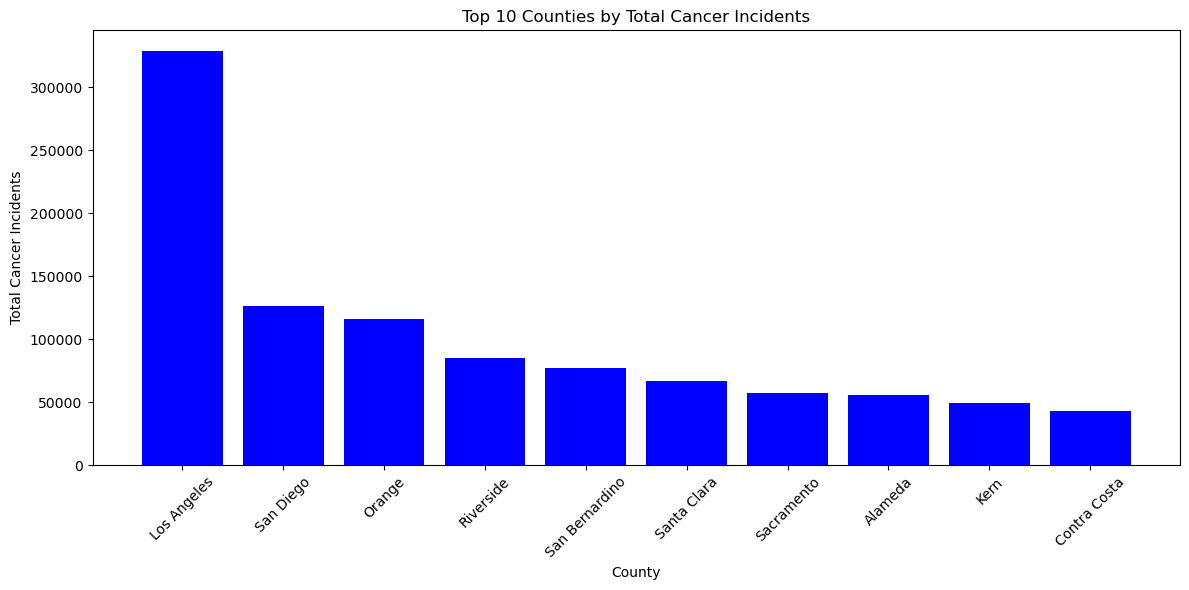

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(cancer_by_county["county"][:10], cancer_by_county["Cancer_Incidents"][:10], color="blue")
plt.xlabel("County")
plt.ylabel("Total Cancer Incidents")
plt.title("Top 10 Counties by Total Cancer Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight: Large, urban counties (Los Angeles, San Diego, Orange, Riverside, San Bernardino) lead in total incidents, largely reflecting population size.

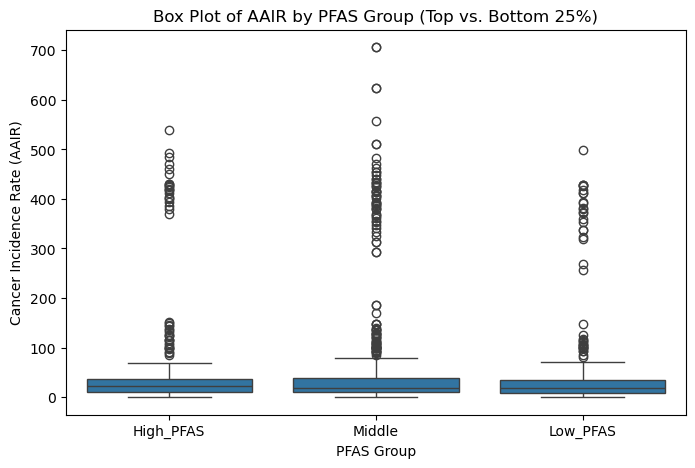

In [48]:
# Sort counties by Avg_PFAS
merged_sorted = merged_df.groupby("county")["Avg_PFAS"].mean().reset_index()
merged_sorted = merged_sorted.sort_values("Avg_PFAS", ascending=False)

# Determine the cutoff for top/bottom 25%
n_counties = len(merged_sorted)
top_25_cutoff = int(n_counties * 0.25)
bottom_25_cutoff = int(n_counties * 0.75)

# Identify top and bottom groups
top_25_counties = merged_sorted["county"].head(top_25_cutoff).tolist()
bottom_25_counties = merged_sorted["county"].tail(top_25_cutoff).tolist()

# Filter the main merged_df for these groups
merged_df["PFAS_Group"] = "Middle"
merged_df.loc[merged_df["county"].isin(top_25_counties), "PFAS_Group"] = "High_PFAS"
merged_df.loc[merged_df["county"].isin(bottom_25_counties), "PFAS_Group"] = "Low_PFAS"

# Box plot of AAIR by PFAS group
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x="PFAS_Group", y="AAIR")
plt.title("Box Plot of AAIR by PFAS Group (Top vs. Bottom 25%)")
plt.xlabel("PFAS Group")
plt.ylabel("Cancer Incidence Rate (AAIR)")
plt.show()

Insight:  The distribution of AAIR appears similar across High_PFAS, Middle, and Low_PFAS counties. This visual supports the idea that PFAS alone may not strongly influence cancer incidence rates at the county level.

## 🔬 PFAS vs Cancer Rate – Hypothesis Testing
This section explores whether higher PFAS levels are associated with increased cancer rates (AAIR) across California counties.

In [49]:
# Load cleaned PFAS dataset
df_pfas = pd.read_csv("data/cleaned/cleaned_pfas.csv")
print("PFAS dataset columns:", df_pfas.columns)
df_pfas.head()

PFAS dataset columns: Index(['county', 'gm_samp_collection_date', '10:2FTS', '11ClPF3OUDS',
       '3:3FTCA', '4:2FTS', '5:3FTCA', '6:2FTS', '7:3FTCA', '8:2FTS',
       '9ClPF3ONS', 'ADONA', 'ETFOSA', 'ETFOSE', 'HFPA-DA', 'MEFOSA', 'MEFOSE',
       'NETFOSAA', 'NMEFOSAA', 'PFBSA', 'PFBTA', 'PFDOA', 'PFDSA', 'PFHA',
       'PFHPA', 'PFHPSA', 'PFHXDA', 'PFHXSA', 'PFNA', 'PFNDCA', 'PFNS', 'PFOA',
       'PFODA', 'PFOS', 'PFOSA', 'PFPA', 'PFPES', 'PFTEDA', 'PFTRIDA',
       'PFUNDCA', 'total_pfas_concentration'],
      dtype='object')


,county,gm_samp_collection_date,10:2FTS,11ClPF3OUDS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,...,PFOA,PFODA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA,total_pfas_concentration
0,Alameda,2018-09-11,1.200595,1.120463,1.658471,2.179993,1.485784,7.667568,1.847953,4.009532,...,1.386294,1.45472,2.442347,1.458615,1.115142,4.951307,1.458615,1.458615,1.115142,66.303941
1,Alameda,2018-11-28,1.200595,1.120463,1.658471,2.179993,1.485784,7.667568,1.847953,4.009532,...,1.360977,1.45472,2.564949,1.458615,1.115142,4.951307,1.098612,1.098612,1.098612,66.519945
2,Alameda,2018-12-04,1.200595,1.120463,1.658471,2.179993,1.485784,7.667568,1.847953,4.009532,...,1.252763,1.45472,2.302585,1.458615,1.115142,4.951307,1.098612,1.098612,1.098612,66.710444
3,Alameda,2019-01-02,1.819467,1.106416,1.161811,0.937471,1.320231,6.535372,1.161811,4.622538,...,1.612766,1.57780,3.378725,4.382941,6.687632,5.971111,1.109662,1.109662,1.109662,87.917981
4,Alameda,2019-01-22,1.819467,1.106416,1.161811,0.937471,1.320231,6.535372,1.161811,4.622538,...,1.709283,1.57780,3.731699,4.382941,6.687632,5.971111,0.880687,0.900799,0.974383,100.922045


In [50]:
pfas_chemicals = df_pfas.columns[2:]
df_pfas["Total_PFAS"] = df_pfas[pfas_chemicals].sum(axis=1)
pfas_by_county = df_pfas.groupby("county")["Total_PFAS"].mean().reset_index()
pfas_by_county.columns = ["County", "Avg_PFAS"]
pfas_by_county.head()

,County,Avg_PFAS
0,Alameda,152.954981
1,Amador,107.188246
2,Calaveras,107.476287
3,Colusa,112.823476
4,Contra Costa,181.767676


In [51]:
merged_df = pd.merge(df, pfas_by_county, how="inner", left_on="county", right_on="County")
merged_df.head()

,county,Sex,Cancer,PopTot,AAIR,Cancer_Incidents,County,Avg_PFAS
0,Alameda,Male,Prostate,4150512,91.9,3814.320528,Alameda,152.954981
1,Alameda,Female,Prostate,4209494,0.0,0.000000,Alameda,152.954981
2,Alameda,Male,Breast,4150512,1.2,49.806144,Alameda,152.954981
3,Alameda,Female,Breast,4209494,125.4,5278.705476,Alameda,152.954981
4,Alameda,Male,Lung,4150512,37.8,1568.893536,Alameda,152.954981


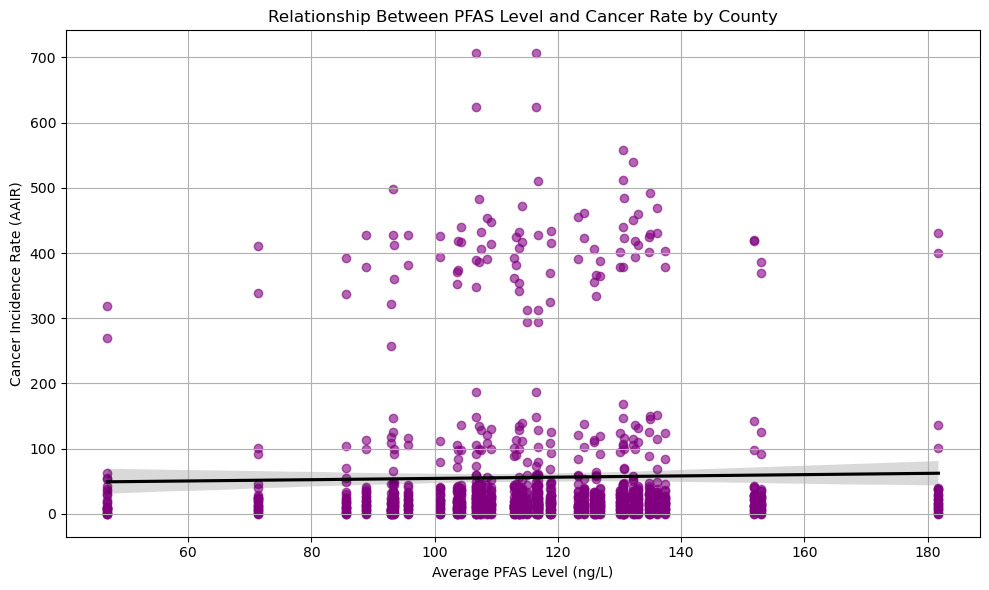

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df, 
    x="Avg_PFAS", 
    y="AAIR",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "black"},
    color = "purple"
)
plt.xlabel("Average PFAS Level (ng/L)")
plt.ylabel("Cancer Incidence Rate (AAIR)")
plt.title("Relationship Between PFAS Level and Cancer Rate by County")
plt.grid(True)
plt.tight_layout()
plt.show()

## 📉 Data Interpretation

The scatter plot shows that there is not a strong linear relationship between PFAS contamination levels and cancer incidence rates (AAIR) across California counties. The trendline is nearly flat and data points are distributed across all four corners of the graph including counties with high PFAS but low cancer rates, and vice versa. 

This suggests that PFAS levels alone do not explain cancer patterns in this dataset. Other factors such as genetics, healthcare access, income, and long-term exposure likely play a significant role.

## 📊 Machine Learning
To probe potential non-linear or complex relationships, we tested a simple Random Forest regressor against a baseline model.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Example feature engineering
merged_df["Population"] = merged_df["PopTot"]  # or from another source
features = ["Avg_PFAS", "Population"]          # or "total_pfas_concentration", etc.
target = "AAIR"                                # or "Cancer_Incidents"

# Prepare data
X = merged_df[features].fillna(0)
y = merged_df[target].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Baseline: predict the mean
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Baseline RMSE:", baseline_rmse)
print("Random Forest RMSE:", rf_rmse)


C:\Users\zuhay_xe4gjlw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Baseline RMSE: 103.74129635573493
Random Forest RMSE: 112.89940995293215


C:\Users\zuhay_xe4gjlw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

print("Gradient Boosting RMSE:", gb_rmse)


Gradient Boosting RMSE: 109.35326042489667


C:\Users\zuhay_xe4gjlw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 📉 Data Interpretation

The random forest model offers only a small improvement over the baseline. This suggests PFAS alone may not be a strong predictor of cancer rates. 

The baseline model (predicting the mean) outperforms both Random Forest and Gradient Boosting. This indicates PFAS + population alone are weak predictors of cancer incidence rates, suggesting other demographic or environmental factors are needed.
We may need additional features—like income level, healthcare access, or environmental/lifestyle factors—to see more pronounced correlations or predictive power.